Задание 1: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

Задание 2: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

Задание 3: Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.


In [14]:
from typing import TypeVar
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [11]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

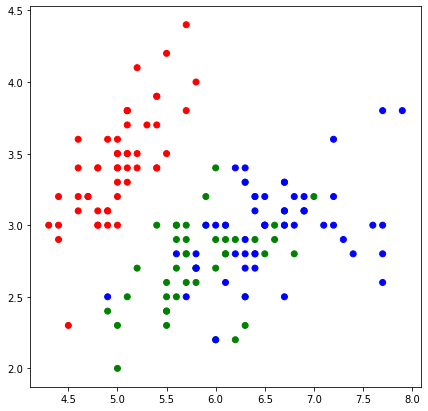

In [5]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [15]:
class KNeighborsClassifier:
    
    KMeans = TypeVar('KMeans', bound='KMeans')
    
    def __init__(self,
                n_neighbors: int=5,
                weights: str='uniform',
                q: float=0.5,
                p: int=2) -> None:
        self.n_neighbors = n_neighbors
        assert weights in ['uniform', 'distance', 'index']
        self.weights = weights
        self.n_class = None
        self.q = q
        self.p = p
        self.X = None
        self.y = None
        
    def fit(self, x_train, y_train) -> KMeans:
        self.X = x_train
        self.y = y_train
        self.n_class = len(np.unique(self.y))
        return self
    
    @property
    def get_graph(self) -> None:
        cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

        h = .02

        # Расчет пределов графика
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Получим предсказания для всех точек
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])

        # Построим график
        Z = np.array(Z).reshape(xx.shape)
        plt.figure(figsize=(7,7))
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Добавим на график обучающую выборку
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, cmap=cmap)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f"Трехклассовая kNN классификация при k = {self.n_neighbors}")
        plt.show()
    
    def predict(self, 
                x_test: np.array) -> np.array:
        
        test_distances = np.apply_along_axis(lambda x: np.dstack((np.linalg.norm(x - self.X, axis=1), self.y)), 1, x_test)[:,0,:,:]
        data = test_distances[0,np.argsort(test_distances[:, :, 0], axis=1)[:,:self.n_neighbors]]
        
        if self.weights == 'uniform':
            u, indices = np.unique(data[:,:,1], return_inverse=True)
            return u[np.argmax(np.apply_along_axis(np.bincount, 1, indices.reshape(data[:,:,1].shape), None, np.max(indices) + 1), axis=1)].flatten()
        
        data = np.concatenate((data, np.ones((data.shape[0],data.shape[1],1))), axis=2)
        if self.weights == 'distance':
            data[:,:,2] = self.q**data[:,:,0]
        else:
            data[:,:,2] /= np.arange(1, k+1)
            
        zer = np.zeros((data.shape[0],1, np.unique(data[:,:,1]).shape[0]) )
        for i in range(self.n_class):
            zer[:,:,i] = np.sum(np.where(data[:,:,1]==np.unique(data[:,:,1])[i], data[:,:,2], False), axis=1).reshape(-1,1)
        return np.unique(data[:,:,1])[np.argmax(zer, axis=2)].flatten()

        
    def score(self, 
              X: np.array, 
              y: np.array) -> float:
        """
        Accuracy метрика 
        """
        return np.mean(np.where(self.predict(X) == y, 1, False))
    

In [17]:
knn = KNeighborsClassifier(n_neighbors = 6, weights='distance')
knn.fit(X_train, y_train)
knn.predict(X_test)

array([0., 1., 2., 0., 2., 2., 2., 0., 0., 2., 1., 0., 2., 2., 2., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 2., 1., 0., 0., 1., 2.])

Точность алгоритма при k = 1: 0.667


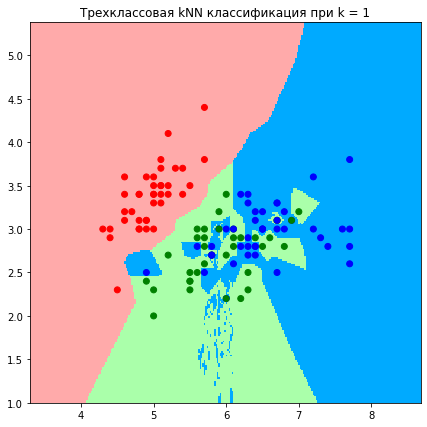

Точность алгоритма при k = 2: 0.633


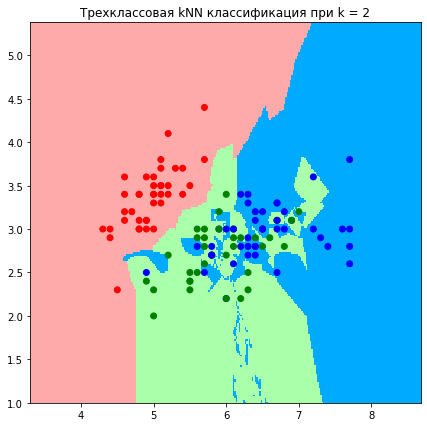

Точность алгоритма при k = 3: 0.767


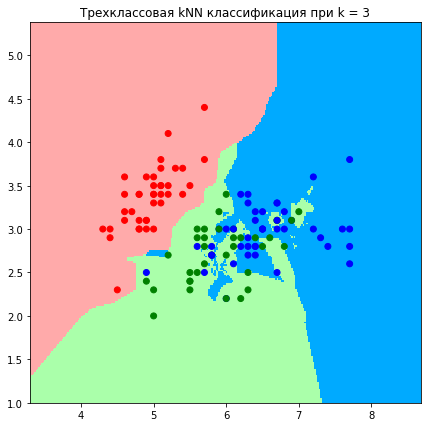

Точность алгоритма при k = 4: 0.800


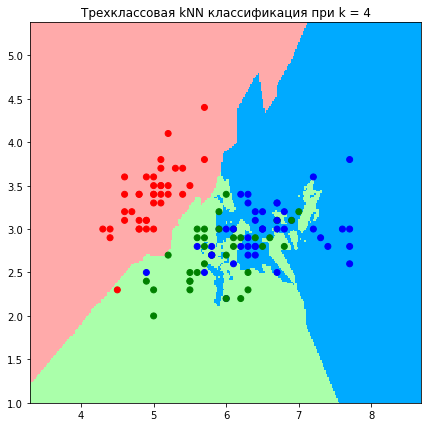

Точность алгоритма при k = 5: 0.833


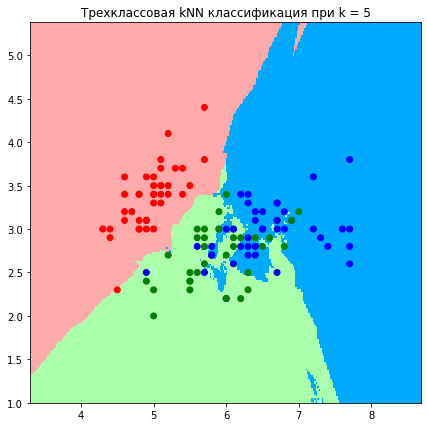

Точность алгоритма при k = 6: 0.867


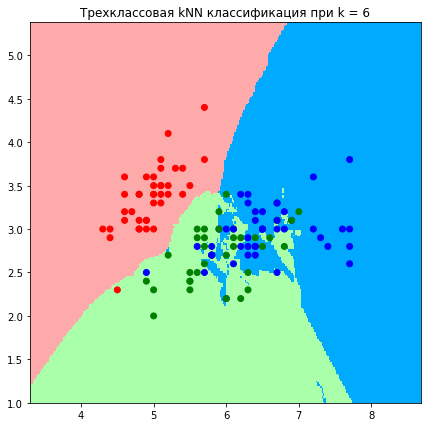

Точность алгоритма при k = 7: 0.800


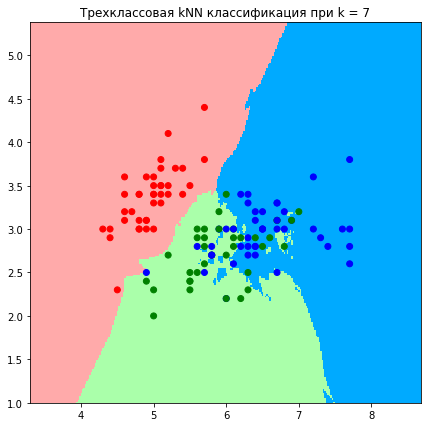

Точность алгоритма при k = 8: 0.867


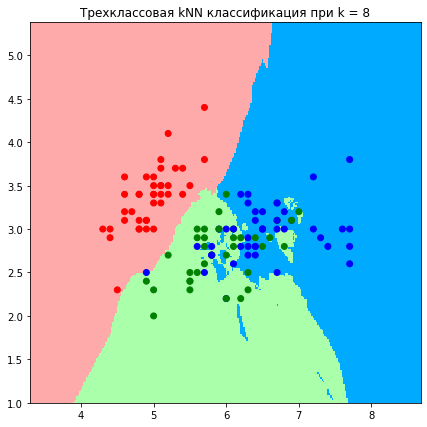

Точность алгоритма при k = 9: 0.867


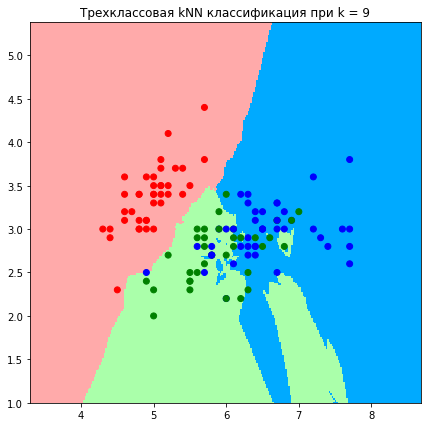

Точность алгоритма при k = 10: 0.867


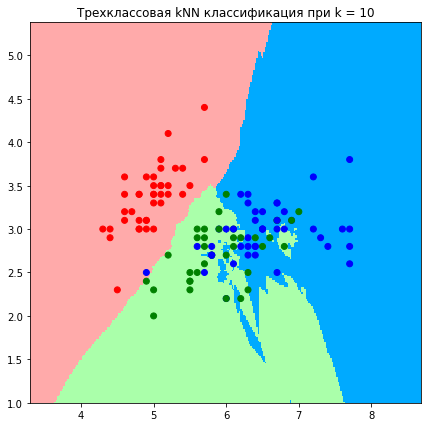

In [18]:
for k in range(1, 11):
    knn.p = 0.5
    weights='distance' #веса по расстоянию
    knn.n_neighbors = k
    print(f'Точность алгоритма при k = {k}: {knn.score(X_test, y_test):.3f}')
    knn.get_graph

Точность алгоритма при k = 1: 0.667


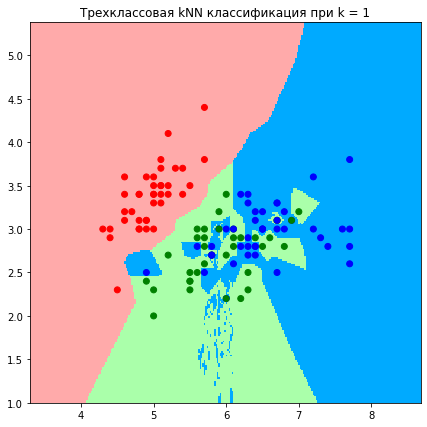

Точность алгоритма при k = 2: 0.633


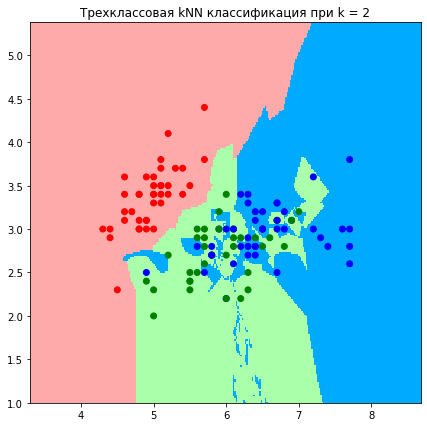

Точность алгоритма при k = 3: 0.767


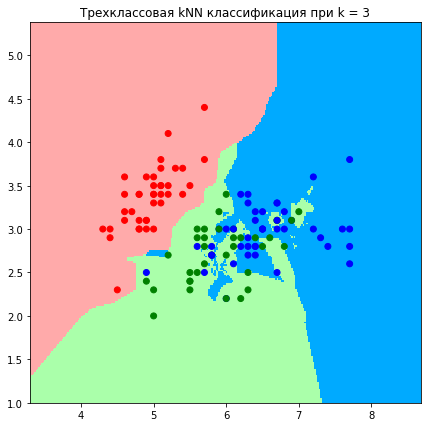

Точность алгоритма при k = 4: 0.800


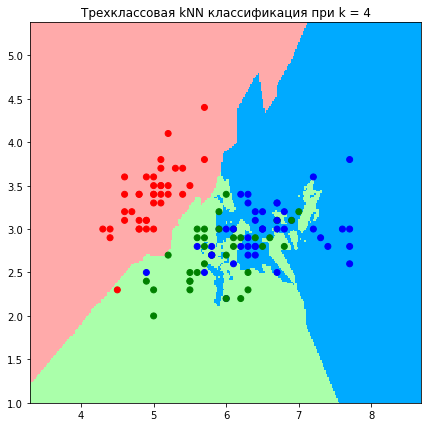

Точность алгоритма при k = 5: 0.833


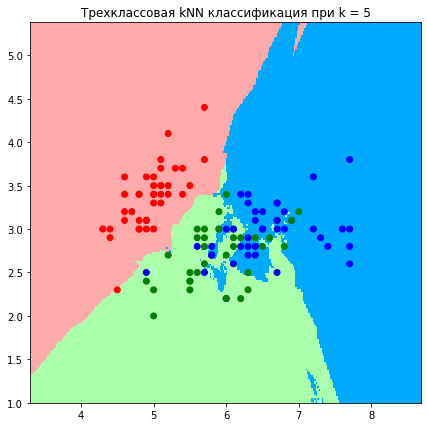

Точность алгоритма при k = 6: 0.867


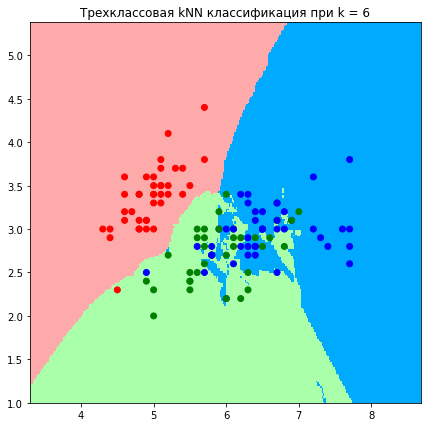

Точность алгоритма при k = 7: 0.800


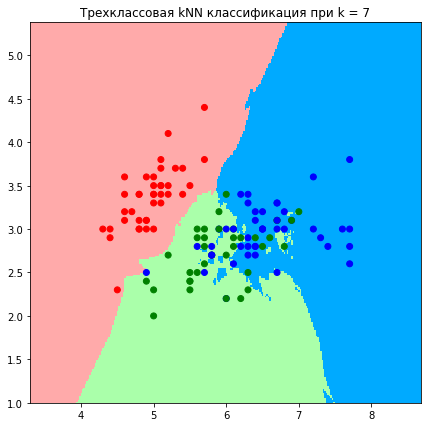

Точность алгоритма при k = 8: 0.867


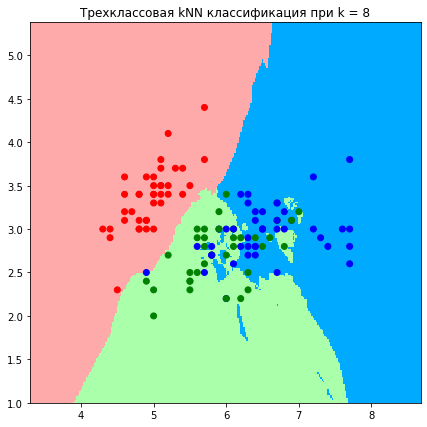

Точность алгоритма при k = 9: 0.867


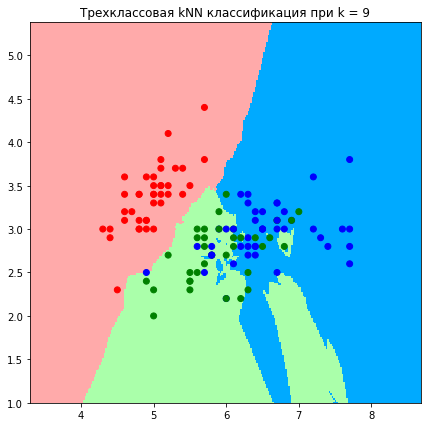

Точность алгоритма при k = 10: 0.867


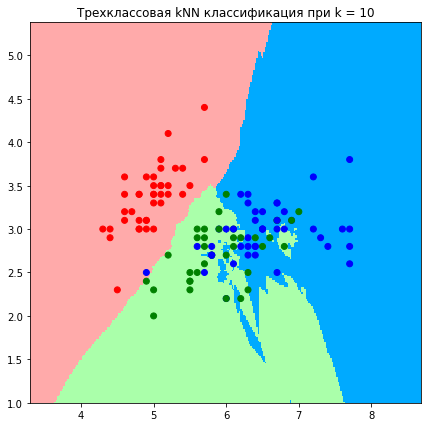

In [19]:
for k in range(1, 11):
    knn.p = 0.5
    weights='index'  #веса по номеру признака
    knn.n_neighbors = k
    print(f'Точность алгоритма при k = {k}: {knn.score(X_test, y_test):.3f}')
    knn.get_graph

Задание 4: (опция) Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [1350]:
# from typing import TypeVar
# import numpy as np
# from sklearn import model_selection
# from sklearn.datasets import load_iris
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap

# X, y = load_iris(return_X_y=True)

# # Для наглядности возьмем только первые два признака (всего в датасете их 4)
# X = X[:, :2]


class KMeans:

    KMeans = TypeVar('KMeans', bound='KMeans')

    def __init__(self,
                 n_clusters: int = 5,
                 min_distance: float = 1e-4,
                 max_iter: int = 30,
                 random_state: int = None) -> None:
        self.n_clusters = n_clusters
        self.classes = np.arange(n_clusters)
        self.min_distance = min_distance
        self.max_iter = max_iter
        self.random_state = random_state
        self._centroids = None

    @property
    def centroids(self) -> np.array:
        return self._centroids

    def fit(self,
            X: np.array) -> KMeans:
        """
        Обучение модели, определяет центроиды кластеров
        """
        np.random.seed(self.random_state)
        self._centroids = X[:self.n_clusters].copy()
        for _ in range(self.max_iter):
            centroids_old = self._centroids.copy()
            labels = np.argmin(
                np.linalg.norm(
                    X - self._centroids[:, None],
                    axis=2),
                axis=0
            )
            for cl in self.classes:
                self._centroids[cl] = np.mean(X[labels == cl], axis=0)
            if np.max(np.linalg.norm(self._centroids - centroids_old, axis=1)) < self.min_distance:
                self._centroids = centroids_old
                break
        return self

    def predict(self,
                X: np.array) -> np.array:
        """
        Предсказывает классы для массива признаков X
        """
        return np.argmin(
            np.linalg.norm(
                X - self.centroids[:, None],
                axis=2),
            axis=0
        )

    def inner_distance(self,
                       X: np.array,
                       y: np.array) -> np.array:
        """
        Суммарное внутрикластерное расстояние
        """
        return np.sum(
            np.apply_along_axis(
                lambda x: np.sum(
                    np.linalg.norm(
                        X[y == x] - self.centroids[x],
                        axis=1)
                ), 1, self.classes[:, None]
            )
        )

    def visualize(self,
                  X: np.array,
                  y: np.array) -> None:
        """
        Визуализация кластеров
        """
        np.random.seed(52)  # при изменении параметра меняется цвет кластеров
        colors = np.random.sample((self.n_clusters, 3))

        plt.figure(figsize=(7, 7))

        # нанесем на график центроиды
        for centroid in self.centroids:
            plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')

        # нанесем объекты раскрашенные по классам
        for i in range(X.shape[0]):
            plt.scatter(X[i, 0], X[i, 1], color=colors[y[i]])

        plt.title(f"Кластеризация KMeans, число кластеров n = {self.n_clusters}")
        plt.show()




125.4389331448834


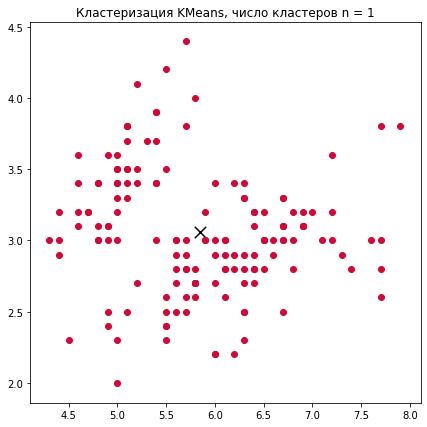

83.30210268521017


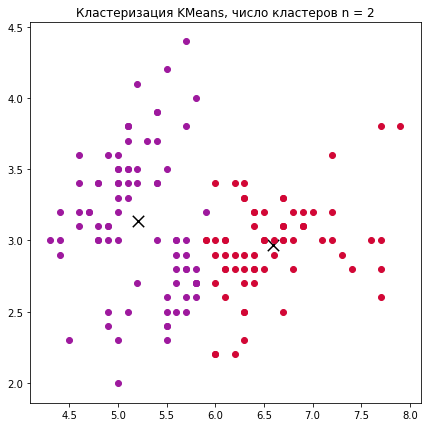

62.76402512603062


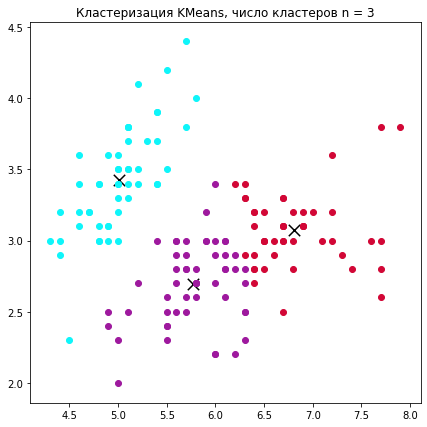

56.40009223431454


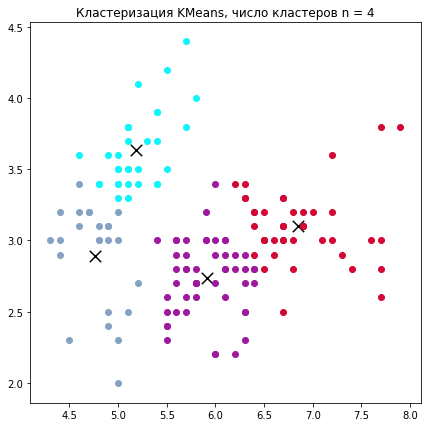

52.41515783932139


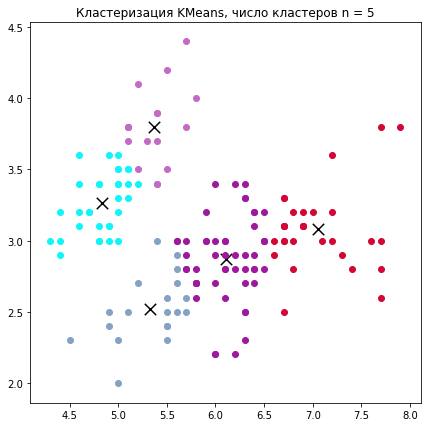

46.25238334783835


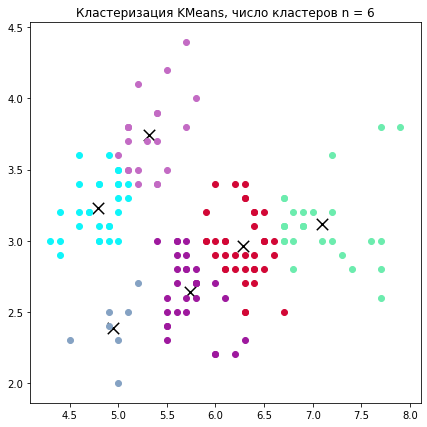

42.8321744498967


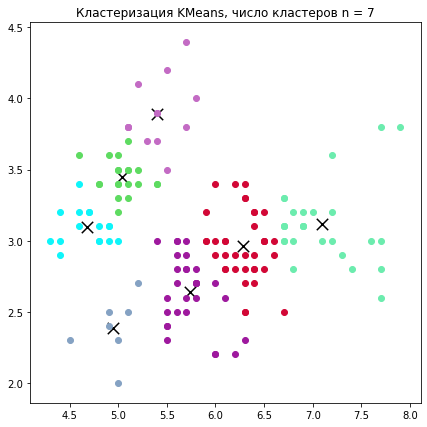

42.25627369963561


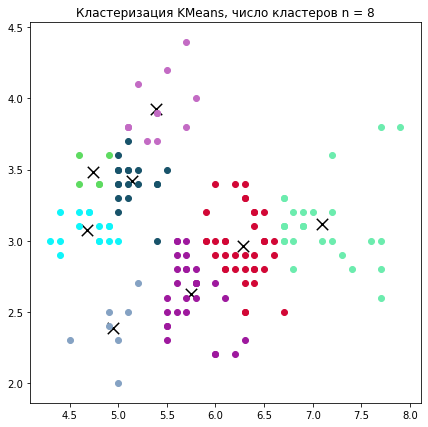

40.956893633056836


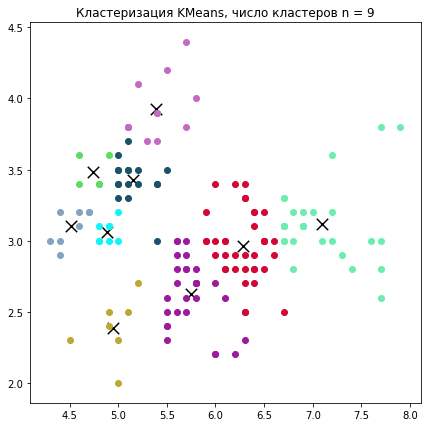

40.39433031795895


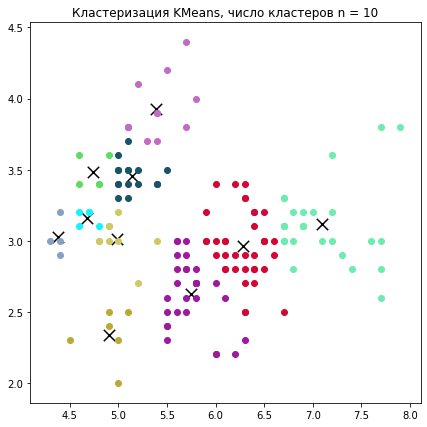

In [1351]:
for n in np.arange(1, 11):
    kmeans = KMeans(n_clusters=n,
                    min_distance=1e-4,
                    max_iter=30).fit(X)
    y_pred = kmeans.predict(X)
    print(kmeans.inner_distance(X, y_pred))
    kmeans.visualize(X, y_pred)